# Switchbacks



## Import de la librairie tracklib

In [15]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import os.path
import sys

#-------------------------------------------------------
# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


## Chargement de la trace + interpolation spatiale

Nombre de points de la trace 1: 144
Nombre de points de la trace 2: 637


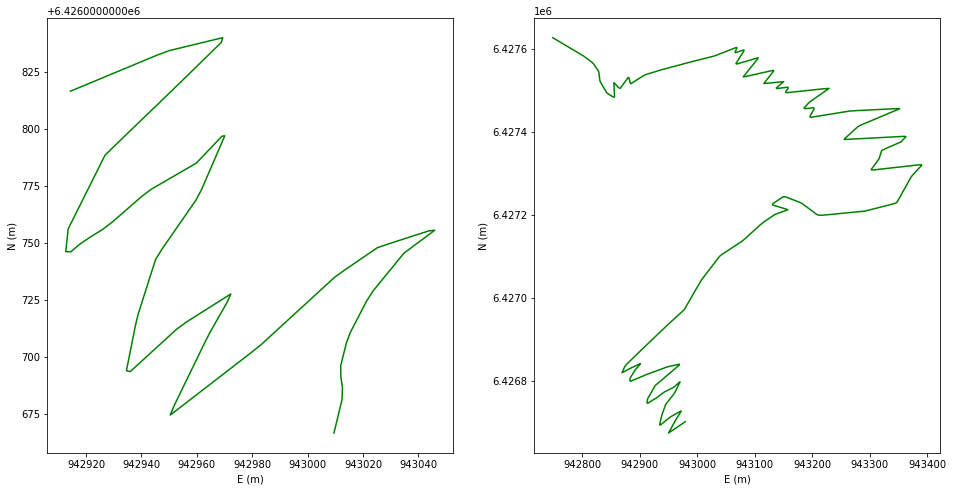

In [20]:
from tracklib.io.FileReader import FileReader
import tracklib.algo.Interpolation as interpolation
import tracklib.core.Plot as Plot

csvpath = '../../../data/lacet/ecrins.csv'
tracks = FileReader.readFromWKTFile(csvpath, 0, 1, 2, ",", 1, 
                                    "ENUCoords", None, True)

trace = tracks["903959","%"][0]

trace1 = trace.extract(270, 300)
trace1.resample(5, interpolation.MODE_SPATIAL)

trace2 = trace.extract(60, 153)
trace2.resample(5, interpolation.MODE_SPATIAL)

print ('Nombre de points de la trace 1:', trace1.size())
print ('Nombre de points de la trace 2:', trace2.size())

plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
trace1.plot(append = True, sym='g-', label='original extract track 1')

plt.subplot(1, 2, 2)
trace2.plot(append = True, sym='g-', label='original extract track 2')

trace11 = trace1.copy()
trace22 = trace2.copy()

## Lissage gaussien de la trace

Nombre de points après la trace 1: 144
Nombre de points après la trace 2: 637


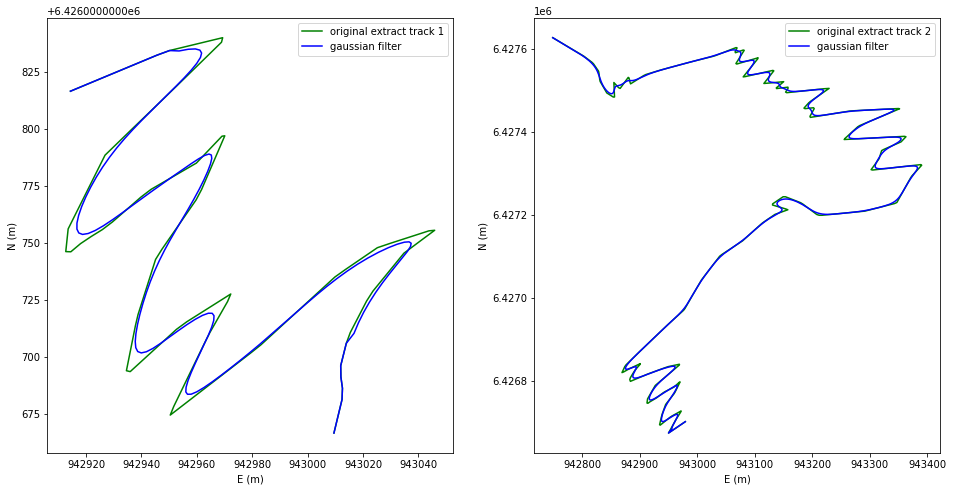

In [34]:
from tracklib.core.Kernel import GaussianKernel
from tracklib.core.Operator import Operator

trace1 = trace11.copy()
trace2 = trace22.copy()

kernel = GaussianKernel(3)

trace1.operate(Operator.FILTER, "x", kernel, "x_filtered")
trace1.operate(Operator.FILTER, "y", kernel, "y_filtered")
trace1.operate("x=x_filtered")
trace1.operate("y=y_filtered")

plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
trace11.plot(append = True, sym='g-', label='original extract track 1')
trace1.plot(append = True, sym='b-', label='gaussian filter')
plt.legend()

trace2.operate(Operator.FILTER, "x", kernel, "x_filtered")
trace2.operate(Operator.FILTER, "y", kernel, "y_filtered")
trace2.operate("x=x_filtered")
trace2.operate("y=y_filtered")

plt.subplot(1, 2, 2)
trace22.plot(append = True, sym='g-', label='original extract track 2')
trace2.plot(append = True, sym='b-', label='gaussian filter')
print ('Nombre de points après la trace 1:', trace1.size())
print ('Nombre de points après la trace 2:', trace2.size())
plt.legend()




## Point d'inflexion

<AxesSubplot:xlabel='E (m)', ylabel='N (m)'>

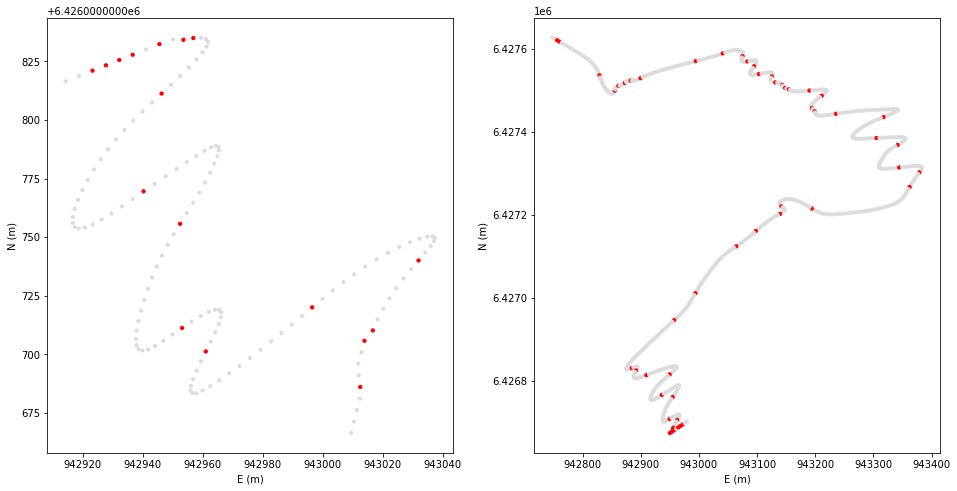

In [32]:
import tracklib.algo.Cinematics as Cinematics
import tracklib.core.Utils as utils

trace1.addAnalyticalFeature(Cinematics.isInflection, "pointinflexion")
trace2.addAnalyticalFeature(Cinematics.isInflection, "pointinflexion")

# Dessin
COLS = utils.getColorMap((220, 220, 220), (255, 0, 0))

plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
trace1.plot(type='POINT', af_name='pointinflexion', append = True, cmap = COLS, pointsize=10)
plt.subplot(1, 2, 2)
trace2.plot(type='POINT', af_name='pointinflexion', append = True, cmap = COLS, pointsize=10)

## Détection des sommets

<AxesSubplot:xlabel='E (m)', ylabel='N (m)'>

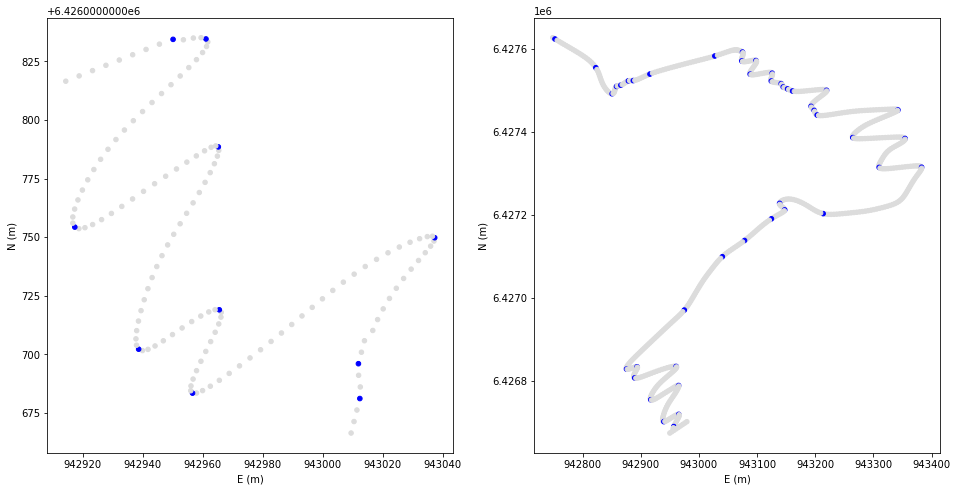

In [33]:
trace1.addAnalyticalFeature(Cinematics.vertex, "sommet")
trace2.addAnalyticalFeature(Cinematics.vertex, "sommet")

COLS = utils.getColorMap((220, 220, 220), (0, 0, 255))

plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
trace1.plot(type='POINT', af_name='sommet', append = True, cmap = COLS, pointsize=20)
plt.subplot(1, 2, 2)
trace2.plot(type='POINT', af_name='sommet', append = True, cmap = COLS, pointsize=20)
